<a href="https://colab.research.google.com/github/chonsawat/AI-HumanDetection/blob/master/Yolov5Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

YOLOv5 🚀 2022-3-18 torch 1.10.0+cu111 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.6/225.9 GB disk)


In [ ]:
import torch
import cv2
from yolov5 import utils
display = utils.notebook_init()  # checks
import matplotlib.pyplot as plt
%matplotlib inline

YOLOv5 🚀 2022-3-18 torch 1.10.0+cu111 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.7/225.9 GB disk)


In [ ]:
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
# model.classes = [0]  # (optional list) filter by class, i.e. = [0, 15, 16] for COCO persons, cats and dogs

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-3-18 torch 1.10.0+cu111 CPU



  0%|          | 0.00/14.1M [00:00<?, ?B/s]

Fusing layers... 


Model Summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


  0%|          | 0.00/476k [00:00<?, ?B/s]

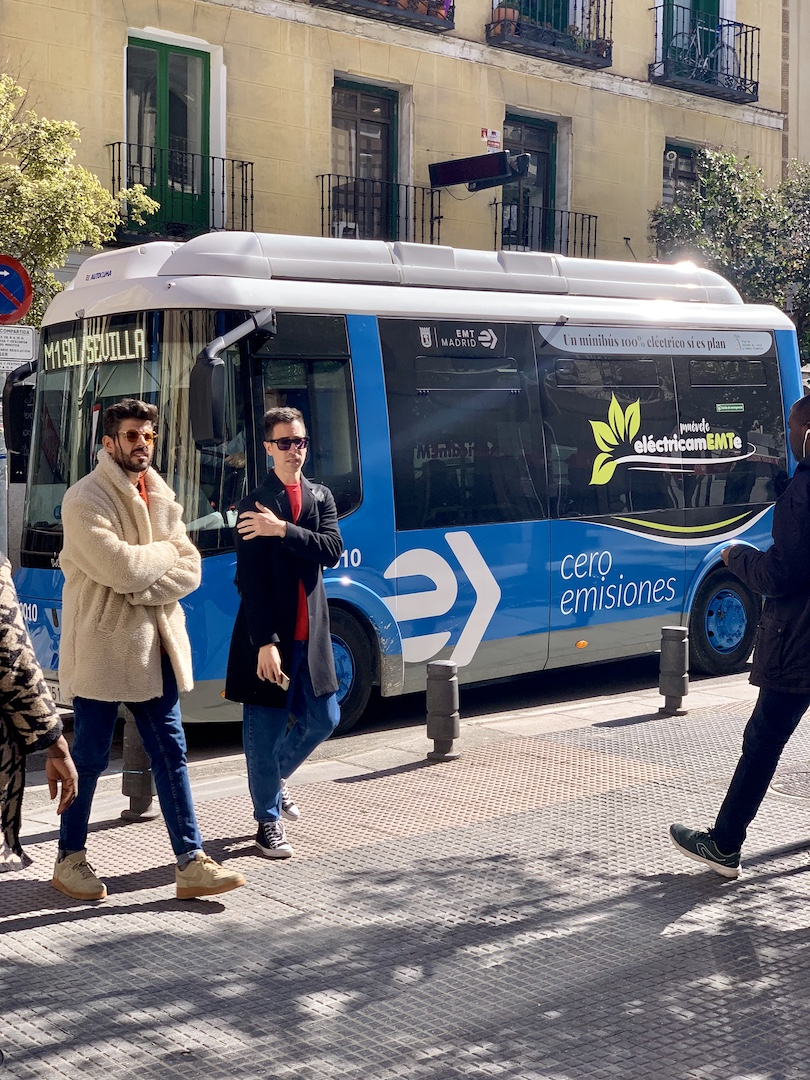

In [ ]:
# Images
torch.hub.download_url_to_file('https://ultralytics.com/images/bus.jpg', 'bus.jpg')  # download 2 images
display.Image(filename='bus.jpg', width=600)

In [ ]:
img = cv2.imread('bus.jpg')[..., ::-1]  # OpenCV image (BGR to RGB)


# Inference
results = model(img, size=640)  # includes NMS

# Results
results.print()  
results.show()  # or .show()

print(results.xyxy[0])  # img1 predictions (tensor)
results.pandas().xyxy[0]  # img1 predictions (pandas)

image 1/1: 1080x810 4 persons, 1 bus
Speed: 14.9ms pre-process, 299.0ms inference, 2.5ms NMS per image at shape (1, 3, 640, 480)


tensor([[6.71788e+02, 3.95372e+02, 8.10000e+02, 8.78361e+02, 8.96172e-01, 0.00000e+00],
        [2.20657e+02, 4.08141e+02, 3.46167e+02, 8.67381e+02, 8.70248e-01, 0.00000e+00],
        [4.92508e+01, 3.89990e+02, 2.48078e+02, 9.12459e+02, 8.51562e-01, 0.00000e+00],
        [1.26508e+01, 2.23378e+02, 8.09707e+02, 7.88516e+02, 8.49334e-01, 5.00000e+00],
        [4.54216e-02, 5.52411e+02, 6.78823e+01, 8.75375e+02, 5.34942e-01, 0.00000e+00]])


,xmin,ymin,xmax,ymax,confidence,class,name
0,671.787903,395.372131,810.000000,878.361328,0.896172,0,person
1,220.657059,408.141022,346.167328,867.381165,0.870248,0,person
2,49.250816,389.990479,248.078232,912.458679,0.851562,0,person
3,12.650843,223.378433,809.707031,788.516479,0.849334,5,bus
4,0.045422,552.411316,67.882339,875.374634,0.534942,0,person


In [ ]:
results.names

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

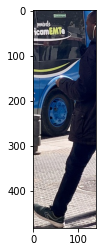

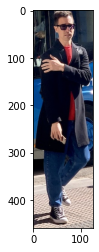

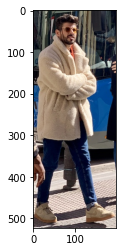

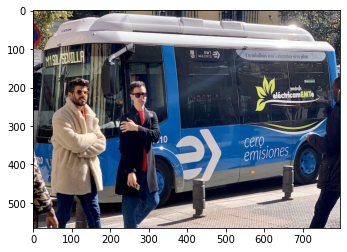

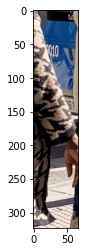

In [ ]:
for i in range(len(results.xyxy[0])):
  xmin,	ymin,	xmax,	ymax	=results.xyxy[0][i,0:4].tolist()
  xmin=int(xmin)
  ymin=int(ymin)
  xmax=int(xmax)
  ymax=int(ymax)
  plt.figure()
  plt.imshow(img[ymin:ymax,xmin:xmax])
  plt.show()

detect: weights=['yolov5s.pt'], source=bus.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-39-g4effd06 torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
image 1/1 /content/yolov5/yolov5/yolov5/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.283s)
Speed: 3.4ms pre-process, 283.3ms inference, 2.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


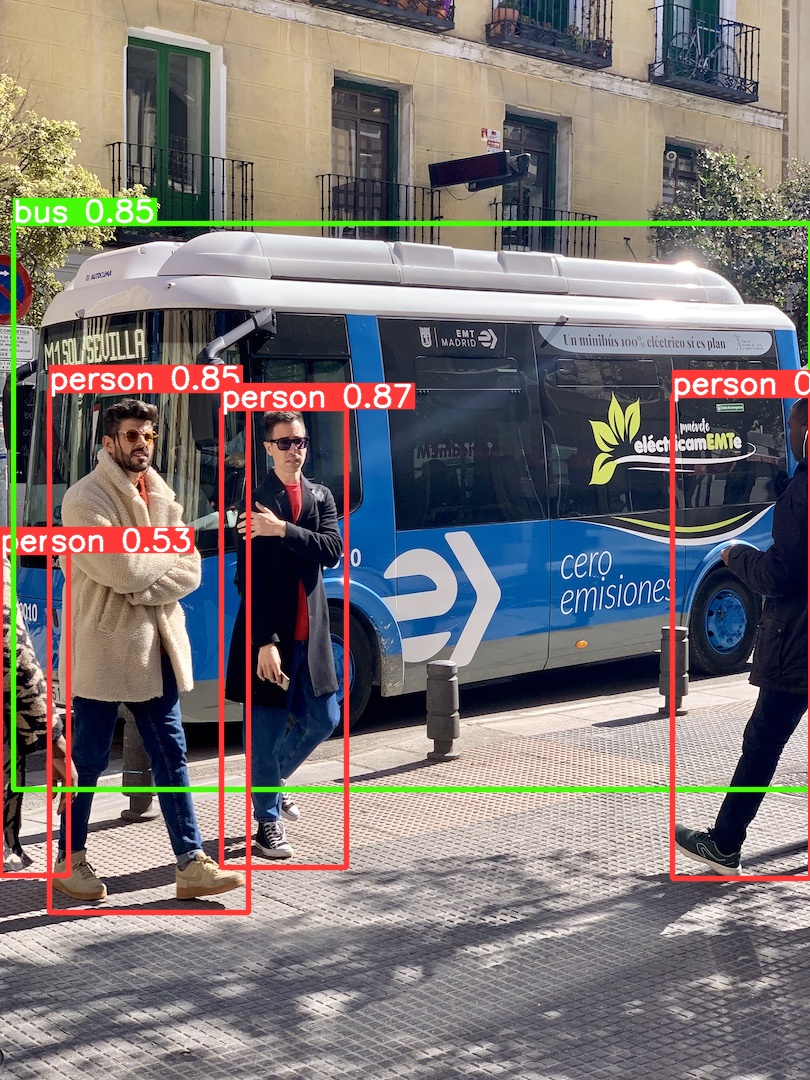

In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source bus.jpg
display.Image(filename='runs/detect/exp/bus.jpg', width=600)